In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd
import folium

In [99]:
# import data
dftarget = pd.read_csv('data/train_target.csv')
dfvalues = pd.read_csv('data/train_values.csv')

# merge on id
df = pd.merge(dftarget, dfvalues, how='inner', on='id')

In [100]:
df.columns

Index(['id', 'status_group', 'amount_tsh', 'date_recorded', 'funder',
       'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name',
       'num_private', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'recorded_by', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [101]:
df = df[['id', 'status_group', 'longitude', 'latitude', 'lga', 'ward', 'region']]
df.head()

,id,status_group,longitude,latitude,lga,ward,region
0,69572,functional,34.938093,-9.856322,Ludewa,Mundindi,Iringa
1,8776,functional,34.698766,-2.147466,Serengeti,Natta,Mara
2,34310,functional,37.460664,-3.821329,Simanjiro,Ngorika,Manyara
3,67743,non functional,38.486161,-11.155298,Nanyumbu,Nanyumbu,Mtwara
4,19728,functional,31.130847,-1.825359,Karagwe,Nyakasimbi,Kagera


In [102]:
df.isna().sum()

id              0
status_group    0
longitude       0
latitude        0
lga             0
ward            0
region          0
dtype: int64

In [103]:
wards = gpd.read_file('data/tanzanian_wards.json')

In [104]:
wards.head()

,id,Region_Cod,Region_Nam,District_C,District_N,Ward_Code,Ward_Name,Division,SHAPE_Leng,SHAPE_Area,geometry
0,tzwards.1,01,Dodoma,01,Kondoa,011,Bumbuta,,0.769320,0.015383,"MULTIPOLYGON (((35.93797 -4.59965, 35.93713 -4..."
1,tzwards.2,01,Dodoma,01,Kondoa,021,Pahi,,0.450216,0.008900,"MULTIPOLYGON (((35.93538 -4.61442, 35.93383 -4..."
2,tzwards.9,01,Dodoma,01,Kondoa,101,Kisese,,0.593859,0.016756,"MULTIPOLYGON (((35.82970 -4.42931, 35.83131 -4..."
3,tzwards.3,01,Dodoma,01,Kondoa,041,Haubi,,0.538672,0.012175,"MULTIPOLYGON (((35.92096 -4.75024, 35.92699 -4..."
4,tzwards.4,01,Dodoma,01,Kondoa,051,Kalamba,,0.678941,0.023225,"MULTIPOLYGON (((35.88480 -4.78808, 35.88824 -4..."


In [105]:
len(wards)

3644

<AxesSubplot:>

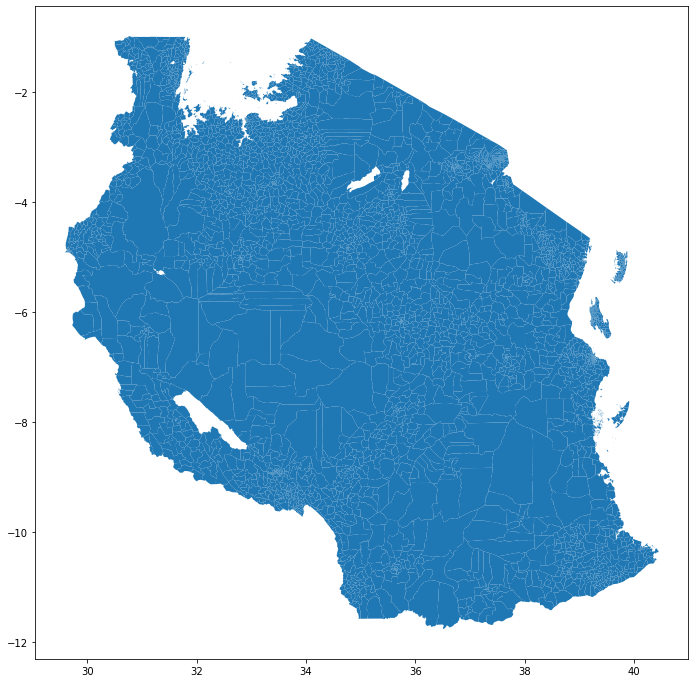

In [106]:
fig, ax = plt.subplots(figsize=(12,12))

wards.plot(missing_kwds={'color': 'lightgrey'}, ax=ax)

In [107]:
df.groupby('ward')

In [108]:
df['status_group']

0            functional
1            functional
2            functional
3        non functional
4            functional
              ...      
59395        functional
59396        functional
59397        functional
59398        functional
59399        functional
Name: status_group, Length: 59400, dtype: object

In [109]:
wards_indata = []

for w in df['ward']:
    if w not in wards_indata:
        wards_indata.append(w)
    else:
        continue

len(wards_indata)

2092

In [110]:
ward_dict = {w: 0 for w in wards_indata}
ward_dict['Natta']

0

In [111]:
to_repair = ['non functional', 'functional needs repair']

for i in range(len(df)):
    
    if df.loc[i, 'status_group'] in to_repair:
        ward_dict[df.loc[i, 'ward']] += 1
#     if x['status_group'] in to_repair:
#         print(x['ward'])
#     else:
#         Continue

In [112]:
ward_dict

{'Mundindi': 14,
 'Natta': 28,
 'Ngorika': 1,
 'Nanyumbu': 26,
 'Nyakasimbi': 2,
 'Moa': 4,
 'Samuye': 28,
 'Chambo': 17,
 'Itetemia': 23,
 'Kaisho': 18,
 'Tambani': 39,
 'Msindo': 62,
 'Busilili': 15,
 'Siha Kaskazini': 12,
 'Nkoma': 88,
 'Mkowe': 5,
 'Mdandu': 29,
 'Usuka': 75,
 'Ilangala': 19,
 'Mawengi': 4,
 'Matola': 17,
 'Ikungulyabashashi': 8,
 'Kisiwani': 21,
 'Mkigo': 26,
 'Kimochi': 45,
 'Rutamba': 0,
 'Nyaishozi': 7,
 'Mengwe Manda': 23,
 'Siha Kati': 4,
 'Dabalo': 12,
 'Chalinze': 43,
 'Kilema  Kati': 10,
 'Lupanga': 14,
 'Baleni': 9,
 'Oltrumet': 27,
 'Katumbasongwe': 42,
 'Mnenia': 14,
 "Boma la ng'ombe": 18,
 'Rugongowe': 34,
 'Kahe': 0,
 'Ipelele': 0,
 'Mtwango': 30,
 'Merya': 23,
 'Nduruma': 80,
 'Sindano': 21,
 'Kiwira': 12,
 'Wangama': 4,
 'Msaranga': 2,
 'Laela': 15,
 'Makwale': 47,
 "Nyang'hwale": 42,
 'Kiruruma': 39,
 'Njoro': 15,
 'Kurua Vunjo Mashariki': 9,
 'Oltroto': 16,
 'Bargish': 2,
 'Izimbya': 24,
 'Kicheba': 7,
 'Hemtoye': 6,
 'Kagongo': 82,
 'Kikatiti': 

In [113]:
wf = pd.DataFrame.from_dict(ward_dict, orient='index', columns=['num_repair'])

In [114]:
wf['ward'] = wf.index

In [115]:
wf.reset_index(drop=True, inplace=True)

In [116]:
wf.head()

,num_repair,ward
0,14,Mundindi
1,28,Natta
2,1,Ngorika
3,26,Nanyumbu
4,2,Nyakasimbi


In [117]:
wards = pd.merge(wards, wf, how='left', left_on='Ward_Name', right_on='ward')
wards.head()

,id,Region_Cod,Region_Nam,District_C,District_N,Ward_Code,Ward_Name,Division,SHAPE_Leng,SHAPE_Area,geometry,num_repair,ward
0,tzwards.1,01,Dodoma,01,Kondoa,011,Bumbuta,,0.769320,0.015383,"MULTIPOLYGON (((35.93797 -4.59965, 35.93713 -4...",9.0,Bumbuta
1,tzwards.2,01,Dodoma,01,Kondoa,021,Pahi,,0.450216,0.008900,"MULTIPOLYGON (((35.93538 -4.61442, 35.93383 -4...",40.0,Pahi
2,tzwards.9,01,Dodoma,01,Kondoa,101,Kisese,,0.593859,0.016756,"MULTIPOLYGON (((35.82970 -4.42931, 35.83131 -4...",18.0,Kisese
3,tzwards.3,01,Dodoma,01,Kondoa,041,Haubi,,0.538672,0.012175,"MULTIPOLYGON (((35.92096 -4.75024, 35.92699 -4...",4.0,Haubi
4,tzwards.4,01,Dodoma,01,Kondoa,051,Kalamba,,0.678941,0.023225,"MULTIPOLYGON (((35.88480 -4.78808, 35.88824 -4...",2.0,Kalamba


In [118]:
type(wards)

geopandas.geodataframe.GeoDataFrame

In [122]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

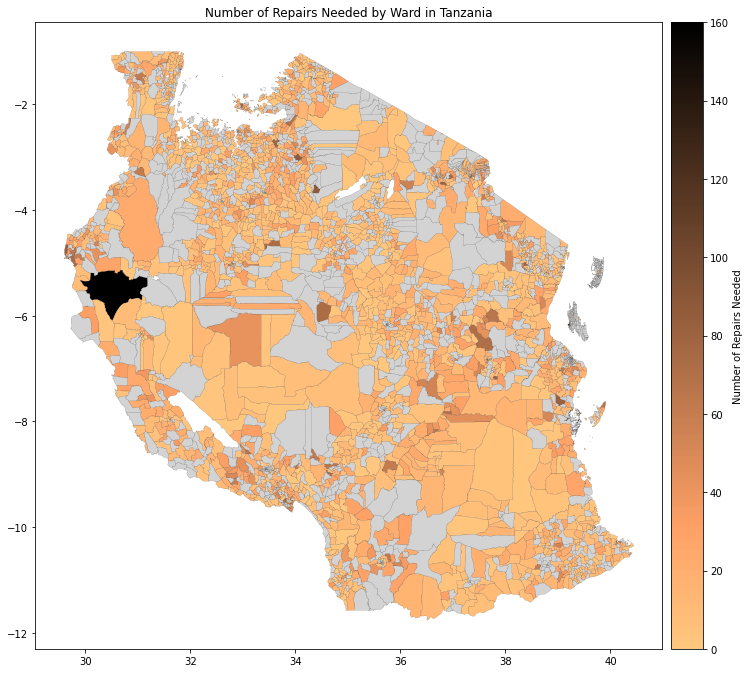

In [157]:
fig, ax = plt.subplots(figsize=(12,12))

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=0.1)

wards.plot(column='num_repair', 
           missing_kwds={'color': 'lightgrey'},
           edgecolor= 'black',
           linewidth= 0.1,
           ax=ax,
           cax=cax,
           legend=True,
           legend_kwds={'label': "Number of Repairs Needed",
                        'orientation': "vertical"},
           cmap='copper_r')

ax.set_title('Number of Repairs Needed by Ward in Tanzania');

#plt.savefig('images/ward_repairs_map_copper.jpg')